## Pareto fronts
One option when considering multiple objectives is to combine different objectives into a single number, but this requires giving weights for their importance.  This can simplify the optimisation problem but may be sensitive to how individual objectives are weighted (if following this approach it will probably be sensible to re-run the algorithm using alternative weighting schemes).


The other option is **pareto fronts**, this is an approach that seeks to explicitly investiate the trade off between different objectives. When one objective cannot be improved without the worsening of another objective we are on what is known as the 'Pareto front'. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Some dummy data: Each item has two scores

scores = np.array([[97, 23],
                  [55, 77],
                  [34, 76],
                  [80, 60],
                  [99,  4],
                  [81,  5],
                  [30, 79],
                  [15, 80],
                  [70, 65],
                  [90, 40],
                  [40, 30],
                  [30, 40],
                  [20, 60],
                  [60, 50],
                  [20, 20],
                  [30,  1],
                  [60, 40],
                  [70, 25],
                  [44, 62],
                  [55, 55],
                  [55, 10],
                  [15, 45],
                  [83, 22],
                  [76, 46],
                  [56, 32],
                  [45, 55],
                  [10, 70],
                  [10, 30],
                 [79, 50]])

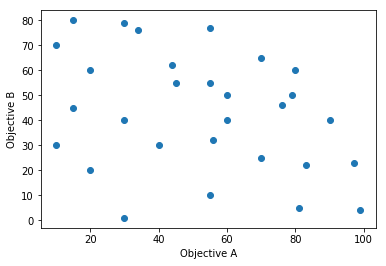

In [2]:
%matplotlib inline

x = scores[:, 0]
y = scores[:, 1]

plt.scatter(x, y)
plt.xlabel('Objective A')
plt.ylabel('Objective B')
plt.show()

In [3]:
def identify_pareto(scores):
    # Count number of items
    population_size = scores.shape[0]
    # Create a NumPy index for scores on the pareto front (zero indexed)
    population_ids = np.arange(population_size)
    # Create a starting list of items on the Pareto front
    # All items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population_size, dtype=bool)
    # Loop through each item. This will then be compared with all other items
    for i in range(population_size):
        # Loop through all other items
        for j in range(population_size):
            # Check if our 'i' pint is dominated by out 'j' point
            if all(scores[j] <= scores[i]) and any(scores[j] < scores[i]):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break
    # Return ids of scenarios on pareto front
    return population_ids[pareto_front]

In [4]:
pareto = identify_pareto(scores)
print ('Pareto front index vales')
print ('Points on Pareto front: \n',pareto)

pareto_front = scores[pareto]
print ('\nPareto front scores')
print (pareto_front)

Pareto front index vales
Points on Pareto front: 
 [14 15 27]

Pareto front scores
[[20 20]
 [30  1]
 [10 30]]


In [5]:
pareto_front_df = pd.DataFrame(pareto_front)
pareto_front_df.sort_values(0, inplace=True)
pareto_front = pareto_front_df.values

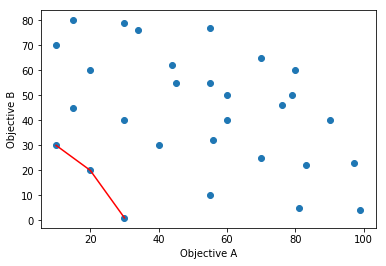

In [6]:
x_all = scores[:, 0]
y_all = scores[:, 1]
x_pareto = pareto_front[:, 0]
y_pareto = pareto_front[:, 1]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_all, y_all)
ax.plot(x_pareto, y_pareto, color='r')
ax.set_xlabel('Objective A')
ax.set_ylabel('Objective B')
fig.savefig("pareto_front.png")
plt.show()
